In [ ]:
!pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf


In [ ]:
def readfile(filename, type_=None):
    '''
    read file
    '''
    f = open(filename)
    data = []
    sentence = []
    label= []
    for line in f:
        if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
            if len(sentence) > 0:
                assert len(sentence) == len(label)
                data.append((sentence,label))
                sentence = []
                label = []
            continue

        #TODO
        if type_!='predict':
            splits = line.split()
            #print(splits)
            sentence.append(splits[0])
            label.append(splits[-1])
            #domain_l = eval(splits[2])

        else:
            splits = line.strip().split()
            sentence.append(splits[0])
            label.append('O')


    if len(sentence) >0:
        data.append((sentence,label))
        assert len(sentence) == len(label)
        sentence = []
        label = []
    return data

def readfile_label(train_file, test_file):
    '''
    read file
    '''
    label_dict = {}
    f_train = open(train_file)
    f_test = open(test_file)

    for line in f_train:
          temp = line.strip()
          if temp!='':

              splits = line.strip().split()
              if splits[-1] != 'O':
                  label_dict[splits[-1]] = 0

    for line in f_test:
          temp = line.strip()
          if temp!='':

              splits = line.strip().split()
              if splits[-1] != 'O':
                  label_dict[splits[-1]] = 0

    return label_dict

In [ ]:
tt = readfile('/content/wnut 16test.txt.conll')
ss = readfile('/content/wnut 16.txt.conll')
print(len(tt))
print(len(ss))

3850
2394


In [ ]:
ss = readfile('/content/wnut 16test.txt.conll')
ss[0]

(['New',
  'Orleans',
  'Mother',
  "'s",
  'Day',
  'Parade',
  'shooting',
  '.',
  'One',
  'of',
  'the',
  'people',
  'hurt',
  'was',
  'a',
  '10-year-old',
  'girl',
  '.',
  'WHAT',
  'THE',
  'HELL',
  'IS',
  'WRONG',
  'WITH',
  'PEOPLE',
  '?'],
 ['B-other',
  'I-other',
  'I-other',
  'I-other',
  'I-other',
  'I-other',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'])

In [ ]:
len(ss)

3850

In [ ]:
import pandas as pd

# create an Empty DataFrame object
df = pd.DataFrame()

print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
df = pd.DataFrame(columns=['Sentences','Tags'])

In [ ]:
for i in range(0,len(ss)):
  df = df.append({'Sentences': ss[i][0], 'Tags': ss[i][1]}, ignore_index=True)

In [ ]:
df

,Sentences,Tags
0,"[New, Orleans, Mother, 's, Day, Parade, shooti...","[B-other, I-other, I-other, I-other, I-other, ..."
1,"[RT, @hxranspizza, :, Going, into, school, tom...","[O, O, O, O, O, O, O, O, O, O, O]"
2,"[May, e, just, a, smile, in, your, heart, EILY...","[O, O, O, O, O, O, O, O, B-movie, O, O]"
3,"[I, could, so, do, Thursday, Club, right, now]","[O, O, O, O, O, O, O, O]"
4,"[@therealdaftbear, Albert, Nobbs, (, Glenn, Cl...","[O, B-person, I-person, O, B-person, O, O, O, ..."
...,...,...
3845,"[Priest, killed, ,, another, injured, in, US, ...","[O, O, O, O, O, O, B-geo-loc, O, O, B-geo-loc,..."
3846,"[Michael__Myerz, :, |LIVE, NOW|, Yes, #meerkat...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3847,"[http://t.co/MoMmuSaDKE, Daily, Fantasy, Baske...","[O, O, O, O, O, O, O, B-other, O, B-company, O..."
3848,"[@Toniakins, no, man, alive, has, it, all, ., ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [ ]:
df['length'] = ''
for i in range(0,len(df)):
  df['length'][i] = len(df['Sentences'][i])

In [ ]:
df

,Sentences,Tags,length
0,"[New, Orleans, Mother, 's, Day, Parade, shooti...","[B-other, I-other, I-other, I-other, I-other, ...",26
1,"[RT, @hxranspizza, :, Going, into, school, tom...","[O, O, O, O, O, O, O, O, O, O, O]",11
2,"[May, e, just, a, smile, in, your, heart, EILY...","[O, O, O, O, O, O, O, O, B-movie, O, O]",11
3,"[I, could, so, do, Thursday, Club, right, now]","[O, O, O, O, O, O, O, O]",8
4,"[@therealdaftbear, Albert, Nobbs, (, Glenn, Cl...","[O, B-person, I-person, O, B-person, O, O, O, ...",24
...,...,...,...
3845,"[Priest, killed, ,, another, injured, in, US, ...","[O, O, O, O, O, O, B-geo-loc, O, O, B-geo-loc,...",23
3846,"[Michael__Myerz, :, |LIVE, NOW|, Yes, #meerkat...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]",14
3847,"[http://t.co/MoMmuSaDKE, Daily, Fantasy, Baske...","[O, O, O, O, O, O, O, B-other, O, B-company, O...",16
3848,"[@Toniakins, no, man, alive, has, it, all, ., ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",27


In [ ]:
df.shape

(3850, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  3850 non-null   object
 1   Tags       3850 non-null   object
 2   length     3850 non-null   object
dtypes: object(3)
memory usage: 90.4+ KB


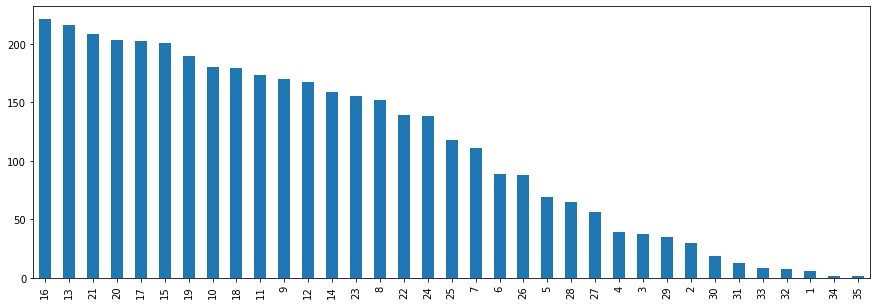

In [ ]:
df['length'].value_counts().plot(kind='bar',figsize=(15,5))

In [ ]:
dfNER = pd.DataFrame(columns=['Sentence','Word','Tag'])

In [ ]:
for i in range(0, len(df)):
  for j in range(0,len(df['Sentences'][i])):
    dfNER = dfNER.append({'Sentence': 'Sentence:'+ str(i),'Word': df['Sentences'][i][j], 'Tag': df['Tags'][i][j]}, ignore_index=True)

In [ ]:
dfNER['Tag'].value_counts()

O                55953
B-geo-loc          882
B-company          621
B-other            584
I-other            556
I-product          500
B-person           482
I-facility         366
I-person           300
I-company          265
B-facility         253
B-product          246
I-geo-loc          219
B-musicartist      191
B-sportsteam       147
I-musicartist      140
I-movie             48
I-sportsteam        48
I-tvshow            40
B-movie             34
B-tvshow            33
Name: Tag, dtype: int64

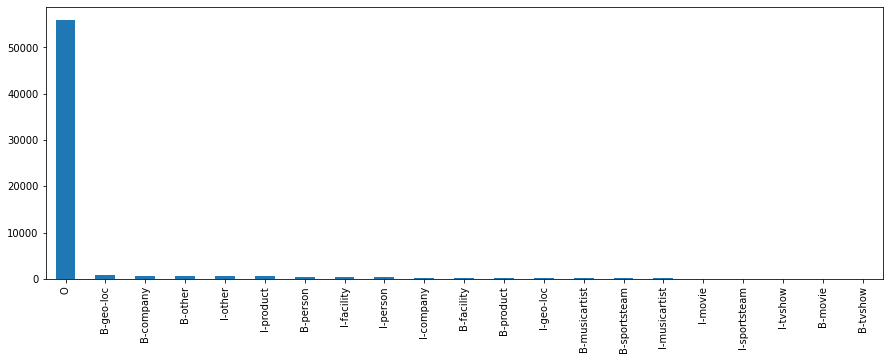

In [ ]:
dfNER['Tag'].value_counts().plot(kind='bar',figsize=(15,5))

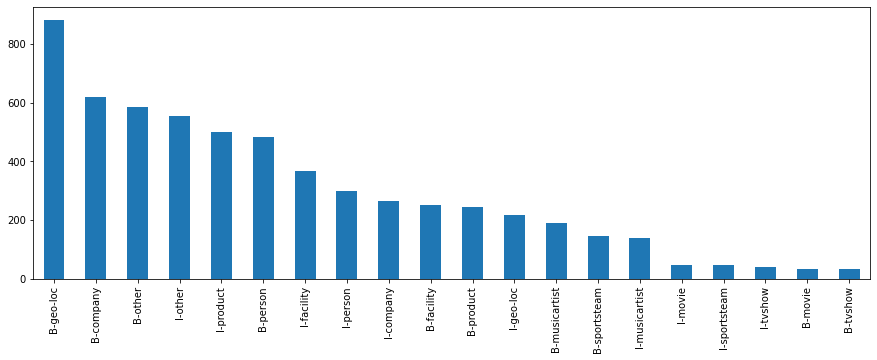

In [ ]:
dfNER[dfNER["Tag"]!="O"]["Tag"].value_counts().plot(kind="bar", figsize=(15,5))


In [ ]:
dfNER

,Sentence,Word,Tag
0,Sentence:0,New,B-other
1,Sentence:0,Orleans,I-other
2,Sentence:0,Mother,I-other
3,Sentence:0,'s,I-other
4,Sentence:0,Day,I-other
...,...,...,...
61903,Sentence:3849,her,O
61904,Sentence:3849,family,O
61905,Sentence:3849,:-),O
61906,Sentence:3849,#OTWOLManilaInLove,O


In [ ]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}

    if token_or_tag == 'token':
        vocab = list(set(dfNER['Word'].to_list()))
    else:
        vocab = list(set(dfNER['Tag'].to_list()))

    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(dfNER, 'token')
tag2idx, idx2tag = get_dict_map(dfNER, 'tag')

In [ ]:
print("The word India is identified by the index: {}".format(token2idx["India"]))
print("The label B-org for the organization is identified by the index: {}".format(tag2idx["B-other"]))


The word India is identified by the index: 3570
The label B-org for the organization is identified by the index: 13


In [ ]:
dfNER['Word_idx'] = dfNER['Word'].map(token2idx)
dfNER['Tag_idx'] = dfNER['Tag'].map(tag2idx)
dfNER.head()

,Sentence,Word,Tag,Word_idx,Tag_idx
0,Sentence:0,New,B-other,13328,13
1,Sentence:0,Orleans,I-other,14611,20
2,Sentence:0,Mother,I-other,5991,20
3,Sentence:0,'s,I-other,1510,20
4,Sentence:0,Day,I-other,11316,20


In [ ]:
data = dfNER.fillna(method='ffill', axis=0)
# Groupby and collect columns
data_grp = data.groupby(
['Sentence'],as_index=False
)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
# Visualise data
data_grp.head()

<ipython-input-23-86242238246c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_grp = data.groupby(


,Sentence,Word,Tag,Word_idx,Tag_idx
0,Sentence:0,"[New, Orleans, Mother, 's, Day, Parade, shooti...","[B-other, I-other, I-other, I-other, I-other, ...","[13328, 14611, 5991, 1510, 11316, 5909, 12990,...","[13, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 1..."
1,Sentence:1,"[RT, @hxranspizza, :, Going, into, school, tom...","[O, O, O, O, O, O, O, O, O, O, O]","[399, 14485, 6442, 526, 16971, 4760, 18134, 43...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]"
2,Sentence:10,"[I, drive, by, that, motel, almost, every, nig...","[O, O, O, O, O, O, O, O, O, O]","[8762, 14904, 9985, 14657, 2908, 6170, 7756, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19]"
3,Sentence:100,"[RT, @askpenners, :, It, 's, gone, ., Done, an...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[399, 15921, 6442, 5972, 1510, 8863, 15011, 25...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
4,Sentence:1000,"[@krisp_y, guess, who, i, won't, allow, to, cl...","[O, O, O, O, O, O, O, O, O, O, O, O]","[10952, 5062, 17252, 18276, 1835, 5821, 14169,...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]"


In [ ]:
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [ ]:
def get_pad_train_test_val(data_group, data):

    #get max token and tag length
    n_token = len(list(set(dfNER['Word'].to_list())))
    n_tag = len(list(set(dfNER['Tag'].to_list())))

    #Pad tokens (X var)
    tokens = data_grp['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    #Pad Tags (y var) and convert it into one hot encoding
    tags = data_grp['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    #Split train, test and validation set
    tokens_, test_tokens, tags_, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.2, train_size=0.8, random_state=2020)
    train_tokens, val_tokens, train_tags, val_tags = train_test_split(tokens_,tags_,test_size = 0.25,train_size =0.75, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags),
        '\nval_tokens:', len(val_tokens),
        '\nval_tags:', len(val_tags),
    )

    return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(data_grp, dfNER)


train_tokens length: 2310 
train_tokens length: 2310 
test_tokens length: 770 
test_tags: 770 
val_tokens: 770 
val_tags: 770


In [ ]:
import numpy as np

print(train_tokens.shape)
print(np.array(train_tags).shape)
print(test_tokens.shape)
print(np.array(test_tags).shape)

(2310, 35)
(2310, 35, 21)
(770, 35)
(770, 35, 21)


In [ ]:
words = list(dfNER['Word'].unique())

In [ ]:
from keras.utils import to_categorical
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional
from tensorflow.keras.layers import Input
from keras.callbacks import ModelCheckpoint

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ytvjxptr
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ytvjxptr
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101076 sha256=7f3f66010bcd60fa1573465aa1e7db0eb4962f236ff93880f6c0eedccaf786ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-67kuyazx/wheels/67/d2/f4/96ae3c3c62d1e05abfc8860ad0c1207794726d44ebbbb547f3
Successfully built keras-contrib


In [ ]:
!pip install tensorflow-addons==0.16.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.3 MB/s 


In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model
from keras_contrib.layers import CRF
import keras as k


In [ ]:
k.__version__


'2.9.0'

In [ ]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [ ]:
input_dim = len(list(set(dfNER['Word'].to_list())))+1
input_length = max([len(s) for s in data_grp['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim,'\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  18321 
input_length:  35 
n_tags:  21


In [ ]:
input_word = Input(shape = (input_length,))
model = Embedding(input_dim = input_dim,output_dim = 75,input_length = input_length)(input_word)

model = LSTM(units=50,return_sequences=True)(model)
out = TimeDistributed(Dense(n_tags,activation = 'softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 75)            1374075   
                                                                 
 lstm (LSTM)                 (None, 35, 50)            25200     
                                                                 
 time_distributed (TimeDistr  (None, 35, 21)           1071      
 ibuted)                                                         
                                                                 
Total params: 1,400,346
Trainable params: 1,400,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
history = model.fit(train_tokens,np.array(train_tags),validation_split=0.2,batch_size = 8,epochs = 10)

Epoch 1/10
231/231 [==============================] - 8s 9ms/step - loss: 0.6512 - accuracy: 0.9496 - val_loss: 0.3436 - val_accuracy: 0.9528
Epoch 2/10
231/231 [==============================] - 3s 12ms/step - loss: 0.2625 - accuracy: 0.9569 - val_loss: 0.2703 - val_accuracy: 0.9524
Epoch 3/10
231/231 [==============================] - 3s 13ms/step - loss: 0.1896 - accuracy: 0.9574 - val_loss: 0.2520 - val_accuracy: 0.9536
Epoch 4/10
231/231 [==============================] - 2s 10ms/step - loss: 0.1555 - accuracy: 0.9605 - val_loss: 0.2475 - val_accuracy: 0.9541
Epoch 5/10
231/231 [==============================] - 2s 10ms/step - loss: 0.1399 - accuracy: 0.9620 - val_loss: 0.2435 - val_accuracy: 0.9545
Epoch 6/10
231/231 [==============================] - 2s 10ms/step - loss: 0.1302 - accuracy: 0.9638 - val_loss: 0.2466 - val_accuracy: 0.9547
Epoch 7/10
231/231 [==============================] - 2s 9ms/step - loss: 0.1223 - accuracy: 0.9646 - val_loss: 0.2504 - val_accuracy: 0.9525
E

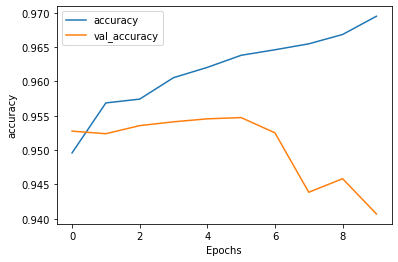

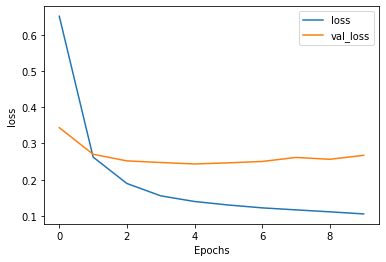

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [ ]:
model.evaluate(test_tokens, np.array(test_tags))


25/25 [==============================] - 0s 9ms/step - loss: 0.2674 - accuracy: 0.9426


[0.26736322045326233, 0.9425603151321411]

In [ ]:
tags = list(set(dfNER['Tag'].values))


In [ ]:
i = np.random.randint(0, test_tokens.shape[0])
p = model.predict(np.array([test_tokens[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(test_tags), axis=-1)[i]

print('{:15}{:5}\t {}\n'.format('Word', 'True', 'Pred'))
print('-'*30)
for w, true, pred in zip(test_tokens[i], y_true, p[0]):
    print('{:15}{}\t{}'.format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 654ms/step
Word           True 	 Pred

------------------------------
experts        O	O
@CarleeDanielle2O	O
WATER          O	O
many           O	O
Thessalonians  O	O
#EFC           O	O
Midland        O	O
http://t.co/QOLYZaBkFfO	O
caching        O	O
#LosMiniDelSonidoO	O
http://t.co/4oz10dVeR1O	O
EXPOSED        O	O
http://t.co/l289M160QjO	O
@IBeQuicker    O	O
#CAU           O	O
jaao           O	O
@IBeQuicker    O	O
Thessalonians  O	O
oasis          O	I-other
@VhinCes       O	O
ink            O	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O


## Bi-LSTMs

In [ ]:
input_word = Input(shape = (input_length,))
model = Embedding(input_dim = input_dim,output_dim = 75,input_length = input_length)(input_word)

model = Bidirectional(LSTM(units=50,return_sequences=True))(model)
out = TimeDistributed(Dense(n_tags,activation = 'softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 35, 75)            1374075   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 100)          50400     
 l)                                                              
                                                                 
 time_distributed_1 (TimeDis  (None, 35, 21)           2121      
 tributed)                                                       
                                                                 
Total params: 1,426,596
Trainable params: 1,426,596
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
history = model.fit(train_tokens,np.array(train_tags),validation_split=0.2,batch_size = 8,epochs = 5)

Epoch 1/5
231/231 [==============================] - 5s 12ms/step - loss: 0.4412 - accuracy: 0.9521 - val_loss: 0.2699 - val_accuracy: 0.9528
Epoch 2/5
231/231 [==============================] - 2s 9ms/step - loss: 0.2147 - accuracy: 0.9569 - val_loss: 0.2319 - val_accuracy: 0.9529
Epoch 3/5
231/231 [==============================] - 2s 9ms/step - loss: 0.1604 - accuracy: 0.9584 - val_loss: 0.2264 - val_accuracy: 0.9551
Epoch 4/5
231/231 [==============================] - 2s 9ms/step - loss: 0.1297 - accuracy: 0.9621 - val_loss: 0.2285 - val_accuracy: 0.9559
Epoch 5/5
231/231 [==============================] - 2s 9ms/step - loss: 0.1131 - accuracy: 0.9668 - val_loss: 0.2346 - val_accuracy: 0.9568


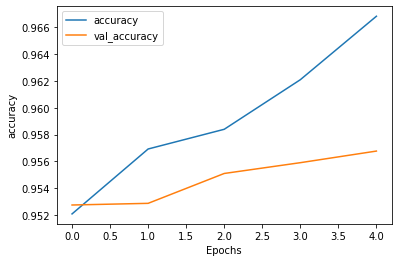

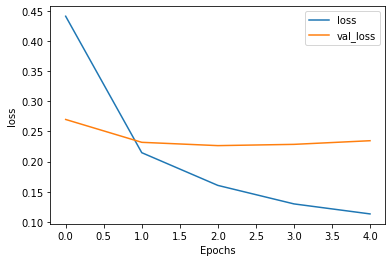

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [ ]:
model.evaluate(test_tokens, np.array(test_tags))


25/25 [==============================] - 0s 4ms/step - loss: 0.2236 - accuracy: 0.9594


[0.22364583611488342, 0.9594433903694153]

In [ ]:
i = np.random.randint(0, test_tokens.shape[0])
p = model.predict(np.array([test_tokens[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(test_tags), axis=-1)[i]

print('{:15}{:5}\t {}\n'.format('Word', 'True', 'Pred'))
print('-'*30)
for w, true, pred in zip(test_tokens[i], y_true, p[0]):
    print('{:15}{}\t{}'.format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 690ms/step
Word           True 	 Pred

------------------------------
featuring      O	O
THAILAND       O	O
avec           O	O
Papers         O	O
https://t.co/P0xXbIfHNBO	O
justified      O	O
https://t.co/Ef0sPEGOULO	O
3/5            O	O
http://sns.mx/zolty2O	O
Ring           O	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O
#OTWOLManilaInLoveO	O


## Transformer

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 30.9 MB/s 
     |████████████████████████████████| 7.6 MB 69.6 MB/s 
     |████████████████████████████████| 182 kB 74.0 MB/s 


In [ ]:
from transformers import *  # this is HuggingFace library
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
config = BertConfig.from_pretrained("bert-base-uncased",output_hidden_states=False) # dropout=0.2, attention_dropout=0.2
bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tokenizer_config.json


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.js

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
sent= 'This is a example'
tokens=bert_tokenizer.tokenize(sent)
print(tokens)

['this', 'is', 'a', 'example']


In [ ]:
ids = bert_tokenizer.convert_tokens_to_ids(tokens)
print("convert_tokens_to_ids:",ids)

ids_encode = bert_tokenizer.encode(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode:",ids_encode)

ids_encode_plus = bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode_plus:",ids_encode_plus)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


convert_tokens_to_ids: [2023, 2003, 1037, 2742]


encode: [101, 2023, 2003, 1037, 2742, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


encode_plus: {'input_ids': [101, 2023, 2003, 1037, 2742, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print("convert_ids_to_tokens:",bert_tokenizer.convert_ids_to_tokens(ids))

print("\ndecode:",bert_tokenizer.decode(ids_encode_plus['input_ids']))

convert_ids_to_tokens: ['this', 'is', 'a', 'example']

decode: [CLS] this is a example [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
max_len = 35

In [ ]:
def create_model(bert_model,max_len = max_len):
    input_ids = tf.keras.Input(shape = (max_len,),dtype = 'int32')
    bert_output = bert_model(input_ids,return_dict =True)
    embedding = tf.keras.layers.Dropout(0.5)(bert_output["last_hidden_state"])
    output = tf.keras.layers.Dense(256,activation = 'relu')(embedding)
    drop = tf.keras.layers.Dropout(0.2)(output)
    out = TimeDistributed(Dense(21,activation = 'softmax'))(drop)

    model = tf.keras.models.Model(inputs = [input_ids],outputs = [out])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
model1 = create_model(bert_model,max_len)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
Some layers from the model checkpoint at be

In [ ]:
model1.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 35)]              0         
                                                                 
 tf_bert_model_2 (TFBertMode  TFBaseModelOutputWithPoo  109482240
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             35, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

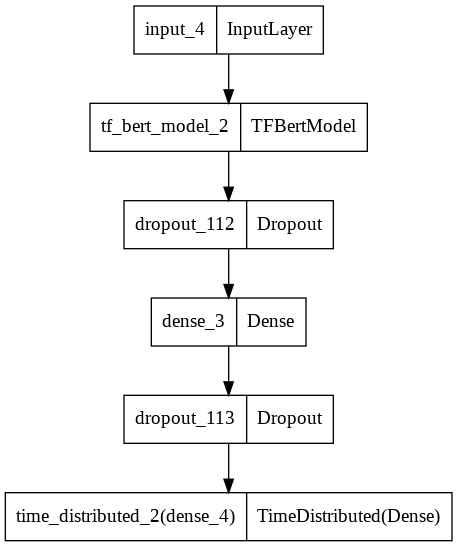

In [ ]:
tf.keras.utils.plot_model(model1)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(mode='min',patience=2)
history_bert = model1.fit([train_tokens],np.array(train_tags),validation_data = ([test_tokens],np.array(test_tags)),epochs = 5,batch_size = 128,callbacks = early_stopping,verbose = True)

Epoch 1/5


19/19 [==============================] - 36s 1s/step - loss: 0.7791 - accuracy: 0.8425 - val_loss: 0.3388 - val_accuracy: 0.9549
Epoch 2/5
19/19 [==============================] - 18s 953ms/step - loss: 0.3224 - accuracy: 0.9560 - val_loss: 0.2921 - val_accuracy: 0.9549
Epoch 3/5
19/19 [==============================] - 18s 944ms/step - loss: 0.3025 - accuracy: 0.9560 - val_loss: 0.2748 - val_accuracy: 0.9549
Epoch 4/5
19/19 [==============================] - 18s 925ms/step - loss: 0.2946 - accuracy: 0.9560 - val_loss: 0.2710 - val_accuracy: 0.9549
Epoch 5/5
19/19 [==============================] - 17s 918ms/step - loss: 0.2914 - accuracy: 0.9560 - val_loss: 0.2705 - val_accuracy: 0.9549


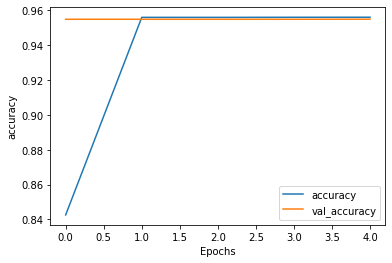

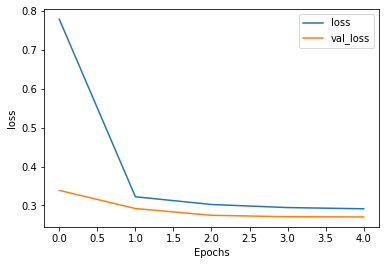

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_bert, "accuracy")
plot_graphs(history_bert, "loss");

In [ ]:
model1.save("NER_BERT",save_format='tf')